#Exploración de datos

In [1]:
import pandas as pd

#Cargar el data set de Drive
file_path = '/content/Online_Retail.csv'
data = pd.read_csv(file_path, encoding='latin1')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [2]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


In [3]:
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [5]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
data.duplicated().sum()

np.int64(5268)

In [8]:
unique_values = {col: data[col].unique() for col in data.columns}

for col, values, in unique_values.items():
  print(f'Columna: {col}')
  print(f'Número de valores únicos: {len(values)}')
  print(f'Valores únicos: {values[:10]}')
  print('-' * 50)

Columna: InvoiceNo
Número de valores únicos: 25900
Valores únicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
Columna: StockCode
Número de valores únicos: 4070
Valores únicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Columna: Description
Número de valores únicos: 4224
Valores únicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Columna: Quantity
Número de valores únicos: 722
Valores únicos: [ 6  8  2 32  3  4 24 12 48 18]
-------------------------------------------------

#Proceso ETL

In [12]:
data_cleaned = data.drop_duplicates()
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [13]:
data_cleaned.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [15]:
data_cleaned.duplicated().sum()

np.int64(0)

In [16]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [18]:
#Calcular la cantidad total
data_cleaned['TotalAmount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [19]:
#cambiar la columna InvoiceDate a serie de tiempo
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned.head()

<ipython-input-19-8a8526100fe8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [30]:
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Semestre'] = data_cleaned['InvoiceDate'].dt.month.apply(lambda x: 1 if x <= 6 else 2)
data_cleaned['Trimestre'] = data_cleaned['InvoiceDate'].dt.quarter
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned['DayName'] = data_cleaned['InvoiceDate'].dt.day_name()
data_cleaned['MonthName'] = data_cleaned['InvoiceDate'].dt.month_name()
print(data_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   

   Year  Mounth    DayName  Month MonthName  Semestre  Trimestre  
0  2010      12  Wednesday     12  De

In [31]:
#Ventas Totales por Año
sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum()
print(sales_by_year)

Year
2010     552372.860
2011    7726146.564
Name: TotalAmount, dtype: float64


In [32]:
sales_by_semester = data_cleaned.groupby(['Year', 'Semestre'])['TotalAmount'].sum()
print(sales_by_semester)

Year  Semestre
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64


In [34]:
sales_by_trimestre = data_cleaned.groupby(['Year', 'Trimestre'])['TotalAmount'].sum()
sales_by_trimestre

Year  Trimestre
2010  4             552372.860
2011  1            1487842.180
      2            1679096.861
      3            2117546.643
      4            2441660.880
Name: TotalAmount, dtype: float64

In [45]:
sales_by_month = data_cleaned.groupby(['Year', 'Month', 'MonthName'])['TotalAmount'].sum()
sales_by_month

Year  Month  MonthName
2010  12     December      552372.860
2011  1      January       473731.900
      2      February      435534.070
      3      March         578576.210
      4      April         425222.671
      5      May           647011.670
      6      June          606862.520
      7      July          573112.321
      8      August        615078.090
      9      September     929356.232
      10     October       973306.380
      11     November     1126815.070
      12     December      341539.430
Name: TotalAmount, dtype: float64

In [67]:
#Crear una columna categoríca basada en el monto total de la transacción low, medium, high
def categorize_total_amount(amount):
  if amount < 20:
    return 'Low'
  elif 20 <= amount < 100:
    return 'Medium'
  else:
    return 'High'

data_cleaned['AmountCategory'] = data_cleaned['TotalAmount'].apply(categorize_total_amount)
print(data_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   

   Year  Mounth    DayName  Month MonthName  Semestre  Trimestre  \
0  2010      12  Wednesday     12  D

In [48]:
#devoluciones
total_returns = data_cleaned[data_cleaned['Quantity'] < 0].shape[0]
print(f'Total Devoluciones: {total_returns}')

Total Devoluciones: 8872


In [49]:
#No devoluciones
total_non_returns = data_cleaned[data_cleaned['Quantity'] >= 0].shape[0]
print(f'Total No Devoluciones: {total_non_returns}')

Total No Devoluciones: 392732


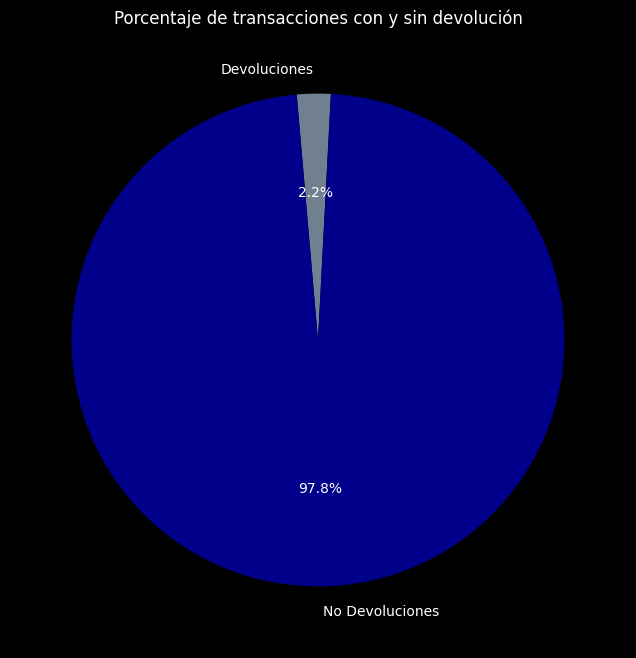

In [117]:
import matplotlib.pyplot as plt

labels = ['Devoluciones', 'No Devoluciones']
sizes = [total_returns, total_non_returns]
colors = ['slategrey', 'darkblue']

fig, ax = plt.subplots(figsize=(8,8), facecolor='Black')

ax.pie(sizes,
        labels=labels,
        startangle=87,
        autopct='%1.1f%%',
        colors=colors)

#Texto de los labels en color blanco
for text in ax.texts:
  text.set(color='White')

ax.set_title('Porcentaje de transacciones con y sin devolución', color='White')
plt.show()

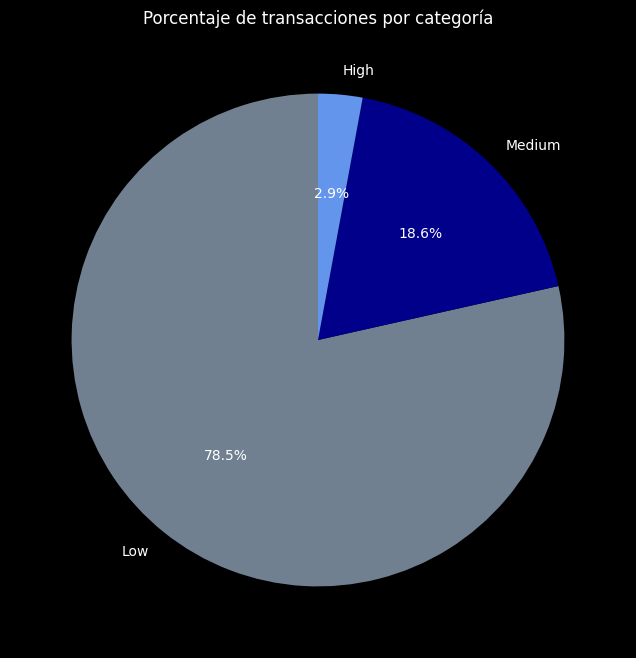

In [78]:
low_sales = data_cleaned[data_cleaned['AmountCategory'] == 'Low'].shape[0]
medium_sales = data_cleaned[data_cleaned['AmountCategory'] == 'Medium'].shape[0]
high_sales = data_cleaned[data_cleaned['AmountCategory'] == 'High'].shape[0]

labels = ['Low', 'Medium', 'High']
sizes = [low_sales, medium_sales, high_sales]
colors = ['slategrey', 'darkblue', 'cornflowerblue']

fig, ax = plt.subplots(figsize=(8,8), facecolor='Black')

ax.pie(sizes,
        labels=labels,
        startangle=90,
        autopct='%1.1f%%',
        colors=colors)

#Texto de los labels en color blanco
for text in ax.texts:
  text.set(color='White')

ax.set_title('Porcentaje de transacciones por categoría', color='White')
plt.show()

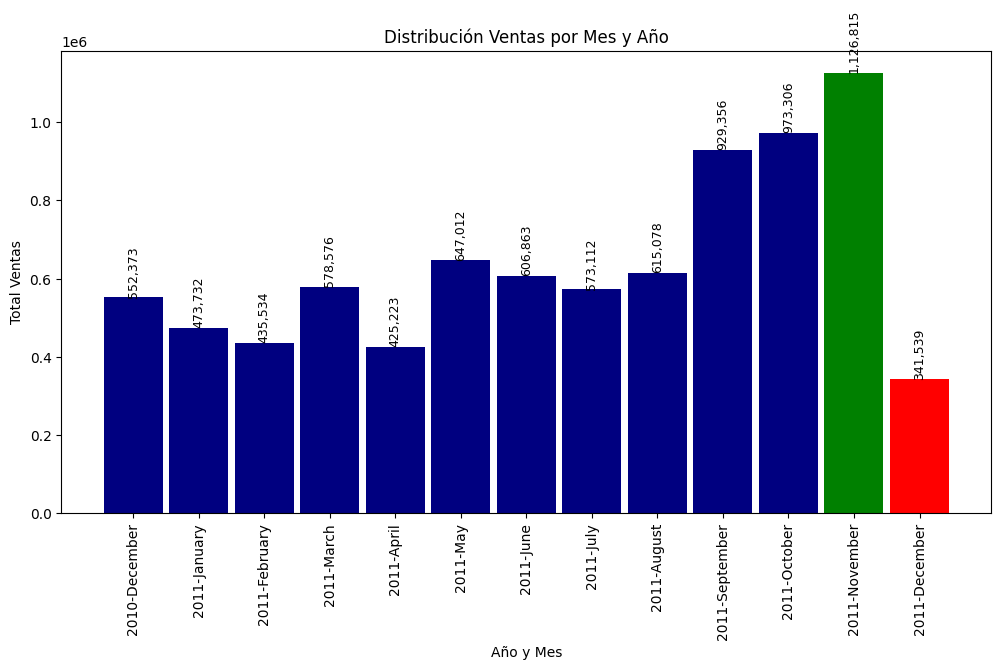

In [107]:
#distribución de ventas por mes y año
ventas_mensuales = data_cleaned.groupby(['Year','Month', 'MonthName'])['TotalAmount'].sum().reset_index()



# Crear etiquetas personalizadas (por ejemplo: '2023-Jan', '2023-Feb', etc.)
ventas_mensuales['Etiqueta'] = ventas_mensuales['Year'].astype(str) + '-' + ventas_mensuales['MonthName']

#obtener valores
x_labels = ventas_mensuales['Etiqueta']
y_values = ventas_mensuales['TotalAmount']

# Colorear: rojo para el menor, verde para el mayor, gris para los demás
colors = ['red' if y == y_values.min() else 'green' if y == y_values.max() else 'navy' for y in y_values]

#crear grafico de barras con las barras más anchas
plt.figure(figsize=(12,6))
bars = plt.bar(x_labels, y_values, color=colors, width=0.9)

#Etiqueta de datos
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}',
           ha='center', va='bottom', rotation=90, fontsize=9)


plt.title('Distribución Ventas por Mes y Año')
plt.xlabel('Año y Mes')
plt.ylabel('Total Ventas')
plt.xticks(rotation=90)
plt.show()

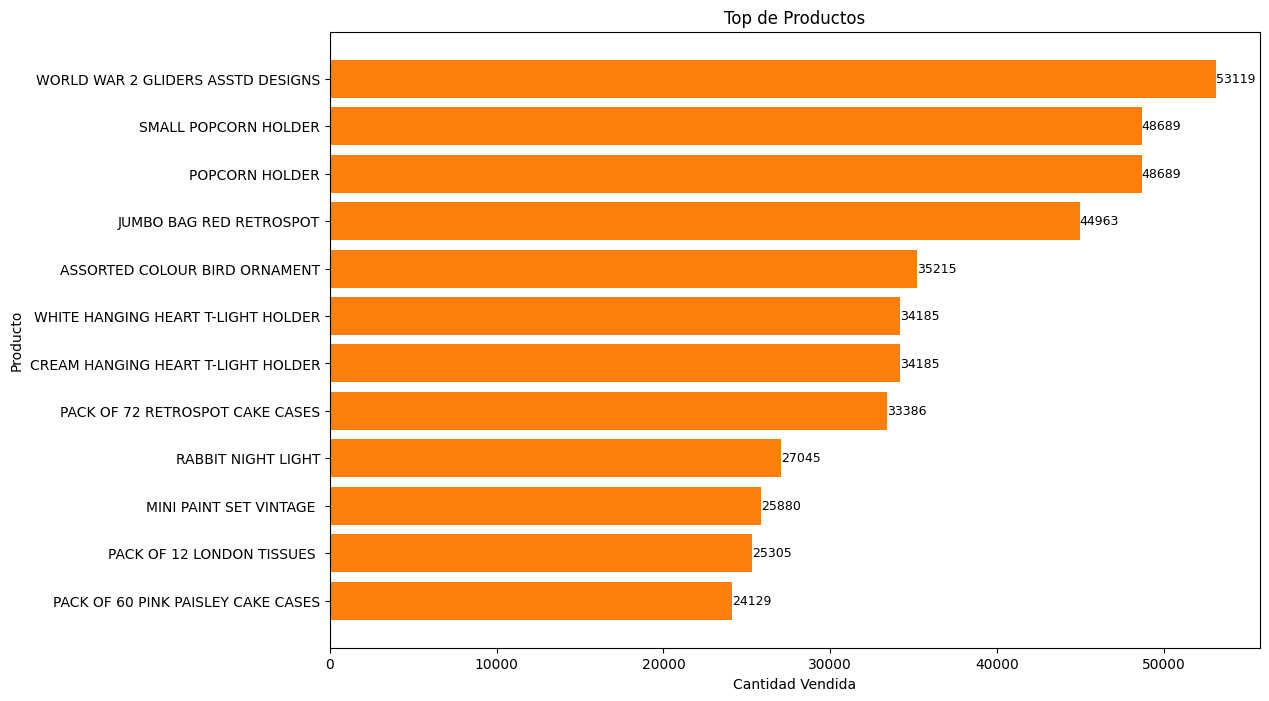

In [114]:
top_products = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()
top_products = pd.merge(top_products, data_cleaned[['StockCode', 'Description']].drop_duplicates(),
                        on='StockCode', how='left')

plt.figure(figsize=(12,8))
products_bars = plt.barh(top_products['Description'], top_products['Quantity'])
plt.barh(top_products['Description'], top_products['Quantity'])
plt.title('Top de Productos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()

#añadir etiqueta de datos
for bar in products_bars:
  width = bar.get_width()
  plt.text(width + 5, bar.get_y() + bar.get_height()/2,
           f'{int(width)}', ha='left', va='center', fontsize=9)

plt.show()